## Importing Libraries

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pandas as pd
import scipy
from IPython.display import display
from IPython.display import Image
from sklearn.datasets import make_regression
from sklearn import tree
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from mlxtend.plotting import plot_decision_regions

# Ensemble Learning
1. If we aggregate predictions from a group of predictors, our predictions will frequently perform better  better than with the best individual predictor. 


2. A group of predictors is called an ensemble


3. Predicting a class that gets the most votes from a group of Decision Tree classifiers trained on a random subset of the training data is a Random Forest

4. Ensemble methods work best when the predictors are independent from eachother. So use different algorithyms

### Hard-Voting Classifier
An example is to train a few classifiers (knn, logistic reg, etc) and aggregate the predictions of each classifier and predict the class that gets the most votes


### Terminology

   - **Weak learning** performs slightly better than guessing


   - **Strong learning** has high accuracy

# Random Forest
    1. Decision Tree work great with the data used to create them but are inflexibile when it comes to new data
    2. Random Forest Combine the simplicity of DT and flexibility improving accuracy

## Original Dataset

In [8]:
np.random.seed(40)
df1 = pd.DataFrame({'Chest_Pain': np.random.choice(['1', '0'],p = [0.8,0.2], size=20),"Weight": np.random.randint(81,110,20), 'High_colesterol': np.random.choice(['1', '0'],p = [0.8,0.2], size=20),
                   'Strong_Blood_circulation': np.random.choice(['1', '0'],p = [0.8,0.2], size=20), "Heart_disease":np.random.choice(['1', '0'], p = [0.8,0.2], size=20)})

df2 = pd.DataFrame({'Chest_Pain': np.random.choice(['1', '0'],p = [0.2,0.8], size=20),"Weight": np.random.randint(40,80,20), 'High_colesterol': np.random.choice(['1', '0'],p = [0.3,0.7], size=20),
                   'Strong_Blood_circulation': np.random.choice(['1', '0'],p = [0.2,0.8], size=20), "Heart_disease":np.random.choice(['1', '0'], p = [0.2,0.8], size=20)})

rf = pd.concat([df1,df2],axis=0)
rf = rf.reset_index(drop=True)

rf


,Chest_Pain,Weight,High_colesterol,Strong_Blood_circulation,Heart_disease
0,1,100,1,0,1
1,1,109,0,1,1
2,1,94,1,1,0
3,1,86,0,0,1
4,1,99,0,1,0
5,1,99,1,1,1
6,1,96,1,1,1
7,1,107,1,1,1
8,1,84,1,1,1
9,1,109,1,1,0


## Bootstrapped Dataset

Sampling with replacement so we can see a few rows that appear more than once

In [9]:
bootstrapped = rf.sample(replace = True, n =40)
bootstrapped

,Chest_Pain,Weight,High_colesterol,Strong_Blood_circulation,Heart_disease
8,1,84,1,1,1
24,0,69,1,1,0
17,1,83,1,1,1
24,0,69,1,1,0
3,1,86,0,0,1
11,1,95,0,1,1
14,1,92,1,1,1
11,1,95,0,1,1
17,1,83,1,1,1
19,1,93,1,1,1


### Step Two

- Create a DT with bootstrapped dataset   
  
  
- Only use a random subset of columns at each step so instead of all 4 columns we will only consider two Chest_Pain, weight

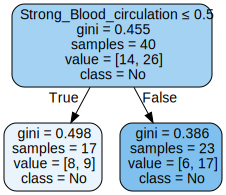

In [11]:
np.random.seed(40)

boot_columns = bootstrapped.drop('Heart_disease',axis=1)
random_two = np.random.choice(boot_columns.columns,2)
X = boot_columns[[random_two[0],random_two[1]]].values

y = bootstrapped['Heart_disease'].values

clf = DecisionTreeClassifier(max_depth =1)
clf = clf.fit(X,y)

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=random_two,  
                     class_names=['Yes','No'],  
                     filled=True, rounded=True,  
                    special_characters=True)  
graphviz.Source(dot_data) 


# We can see that Strong_Blood_circulation did the best in separating the samples
# We would then split the samples at the left and right node by randomly select 2 new columns and so on
# Therefore, we build our tree as usual but only consider a random subset of columns at each split


## Building Our Tree

1. Creating and using a bootstrapped Dataset with replacement
2. Only considering a random subset of variables at each step
3. Repeat steps one and two n number of times

## Visualizing a Random Forest

- We can visualize all the estimators (decision trees) from a random forest. The code below visualizes the first 4 from the random forest model fit above.
- The variety of trees makes RF more effective than DT
- Below is for visualization purposes

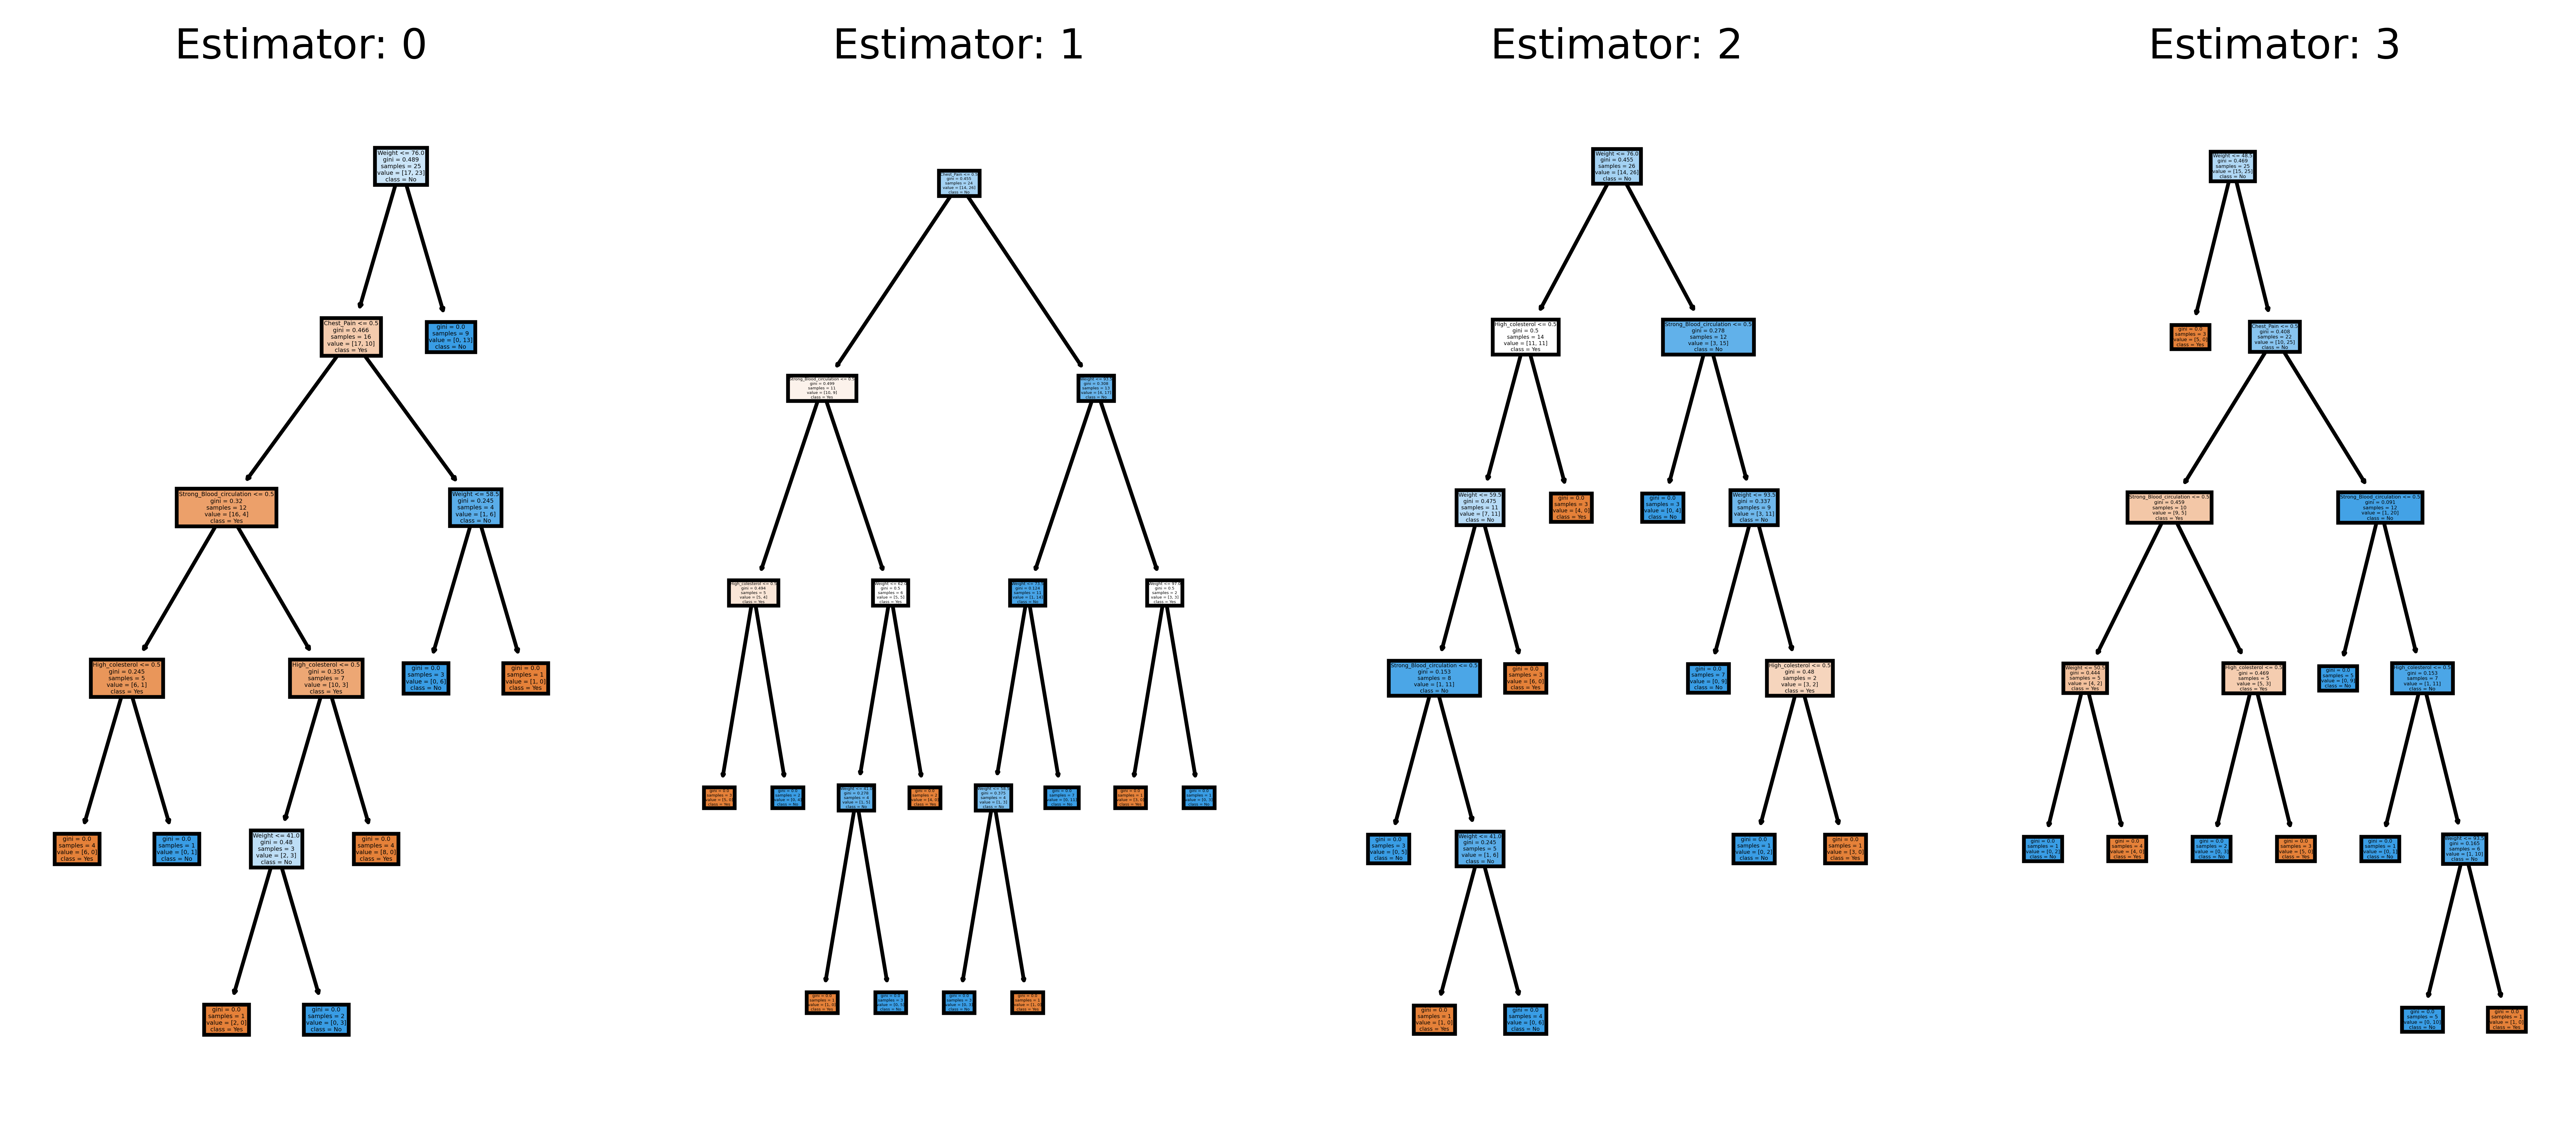

In [140]:
from sklearn.ensemble import RandomForestClassifier

X = bootstrapped.drop('Heart_disease',axis=1).values
y = bootstrapped['Heart_disease'].values

fn=bootstrapped.columns
cn=['Yes','No']

clf = RandomForestClassifier()
clf = clf.fit(X,y)


fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = [12,5], dpi=900)
for index in range(0, 4):
    tree.plot_tree(clf.estimators_[index],
                   filled = True,
                   feature_names = fn, 
                   class_names=cn,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)



## Feature Importance

In [147]:
X = rf.iloc[:,:-1].values
y = rf['Heart_disease'].values

forest_clf = RandomForestClassifier(n_estimators=300, n_jobs=-1)
forest_clf.fit(X, y)
for name, score in zip(rf.columns,forest_clf.feature_importances_):
    print(name, score)
    
# We can see from our feature importance weight significantly stands out

Chest_Pain 0.1338392196309145
Weight 0.7050352548378587
High_colesterol 0.0921634540757274
Strong_Blood_circulation 0.06896207145549954


## Predictions
Let us say we have a patient with:
    - Chest_Pain: 1
    - Weight: 92
    - High_colesterol: No
    - Strong_Blood_circulation: No
Now we want to predict Heart Disease from these variables so we run them down our individual decision trees above and tally the leaf node class prediction i.e, 'Yes' or 'No.

## Bagging
Bootstrapping our data and using the aggregate of our tally to make a decision is called bagging

1. We can train an ensemble of 500 Decision Tree classifiers using the BaggingClassifier which is roughly equivalent to our **RandomForest** class

<AxesSubplot:>

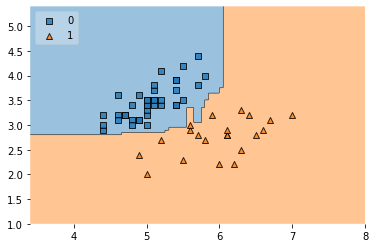

In [133]:
# Splitting our dataset into train and test sets
iris = sns.load_dataset('iris')
y = iris.iloc[0:75,4]
y = np.where(y == 'setosa', 0, 1)
X = iris.iloc[0:75, [0, 1]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
max_samples=60, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

plot_decision_regions(X_train,y_train, clf=bag_clf, legend=2)

## Out-of-Bag Dataset
- Typically a third of data sampled from our original set does not end up in the bootstraped set
- We can see below the rows that only appeared in our original and not our bootstrapped
- We can use this Out-of-Bag data to test our RandomForest as "Unseen Data" and measure its accuracy by the proportion of correctly classified OOB samples
- Our Out-of-Bag error is our proportion of wrong classifications  
- We can no go back to step one bulding a random Forest and instead of using two random columns we can compare the Out-of-Bag error for different number of variables per step 

 
 
**1. Build a random forest.**

 
 
**2. Estimate the accuracy of the random forest**

 
 
 
**3. Build a random forest changing the number of variables per step**


**4. Select most accurate random forest based upon Out-of-Bag error**

In [134]:
df_all = rf.merge(bootstrapped, on=['Chest_Pain', 'Weight', 'High_colesterol', 'Strong_Blood_circulation',
       'Heart_disease'], 
                   how='outer',indicator=True)
df_all[df_all['_merge']=='left_only']

,Chest_Pain,Weight,High_colesterol,Strong_Blood_circulation,Heart_disease,_merge
2,1,109,0,1,1,left_only
5,1,99,0,1,0,left_only
6,1,99,1,1,1,left_only
7,1,96,1,1,1,left_only
8,1,107,1,1,1,left_only
10,1,109,1,1,0,left_only
14,0,104,1,1,0,left_only
15,1,106,1,1,1,left_only
19,1,91,1,1,0,left_only
24,0,99,1,1,1,left_only


## Creating a Voting Classifier

In [139]:
# Splitting our dataset into train and test sets
iris = sns.load_dataset('iris')
X = iris.iloc[:,:3].values
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)


# We want to have three different classification algorithyms
logreg_clf = LogisticRegression()
random_clf = RandomForestClassifier()
svm_clf = SVC(probability =True)

# In our voting classifier we want to add our three classification algorithyms and have hard voting (most votes)
voting_clf = VotingClassifier(
estimators=[('lr', logreg_clf), ('rf', random_clf), ('svc', svm_clf)],
voting='soft')

# training on our dataset
voting_clf.fit(X_train, y_train)

# each individual accuracy from our three classifiers
for clf in (logreg_clf, random_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, round(accuracy_score(y_test, y_pred),2))

LogisticRegression 0.93
RandomForestClassifier 0.9
SVC 0.93
VotingClassifier 0.97
